# K-means clustering

The notebook aims to study and implement a k-means clustering using "sklearn". The iris dataset will be used to identify clusters automatically using the K-means method.


## Acknowledgments

- Used dataset: https://archive.ics.uci.edu/ml/datasets/iris

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [11]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots
from sklearn import datasets         # For loading the iris dataset

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily


# Importing data

In [12]:
#Defines the col names for the iris dataset
iris = datasets.load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [14]:
#Get a general "feel" of the data
dataset = df
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


2. Drop rows with any missing values


In [15]:
dataset = dataset .dropna()

print(dataset.shape)

(150, 5)


3. Encoding the class label categorical column: from string to num


In [16]:
# Encoding the categorical column {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}
dataset = dataset.replace({"Flower":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} })

#Visualize the dataset
dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


Now the label/category is numeric


4. Discard columns that won't be used


In [22]:
# If necesary, drop out non necesary columns
dataset = dataset.drop(columns=['target'])

#Visualize the dataset
dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


5. Scatter plot of the data

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

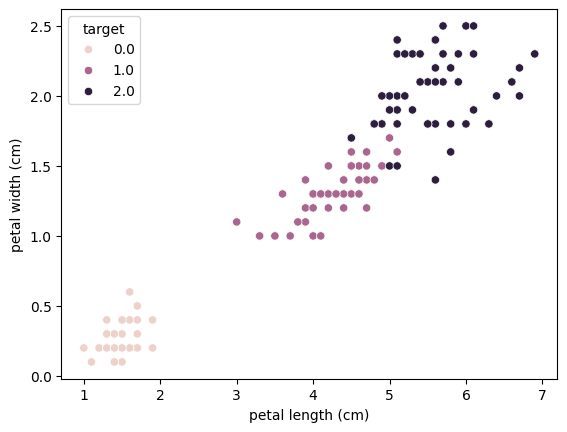

In [24]:
#Scatter plot of the data
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='target')

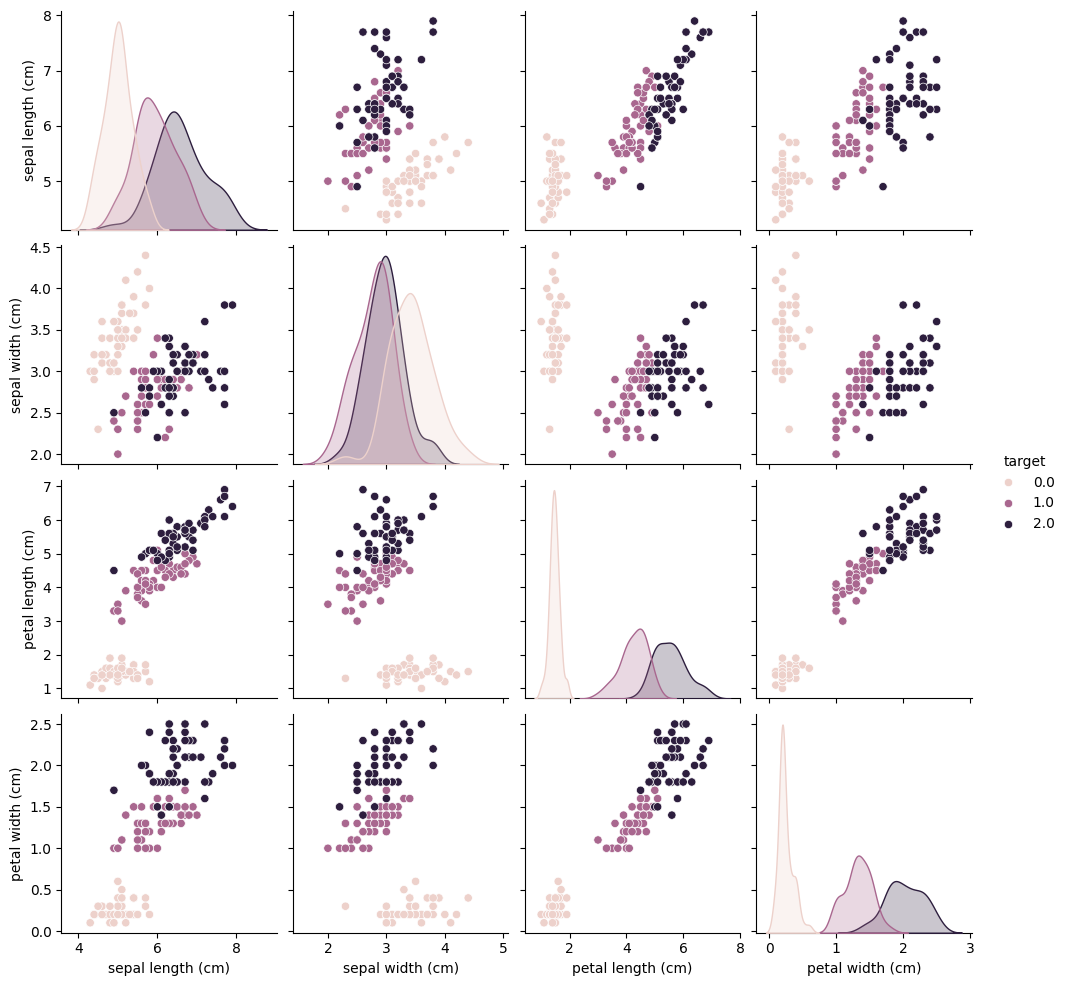

In [27]:
# Pairplot: Scatterplot of all variables
sns.pairplot(df, hue='target')

6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

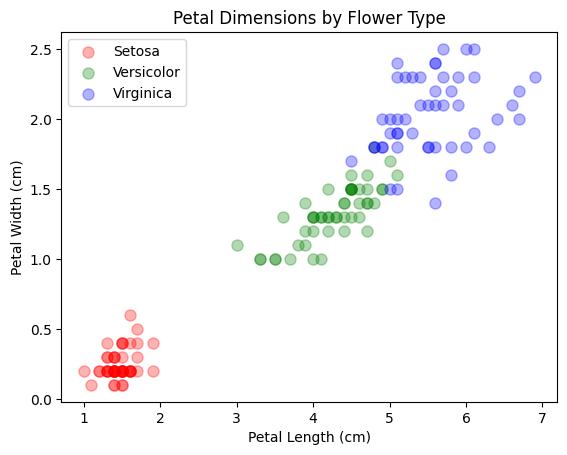

In [28]:
# Crear dataframes para cada "cluster" real (basado en el target)
df1 = df[df.target == 0]
df2 = df[df.target == 1]
df3 = df[df.target == 2]

# Scatter plot de cada "cluster" real
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], label='Setosa', c='r', marker='o', s=64, alpha=0.3)
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], label='Versicolor', c='g', marker='o', s=64, alpha=0.3)
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'], label='Virginica', c='b', marker='o', s=64, alpha=0.3)

plt.title('Petal Dimensions by Flower Type')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.show()


Recall that for this dataset we know in advance the class to which each point belongs to

# Kmeans clustering

Kmeans clustering

In [30]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
km = KMeans(n_clusters=3, n_init="auto")

# Do K-means clustering (assing each point in the dataset to a cluster)
#FlowerPredicted1 = km.fit_predict(dataset)
#FlowerPredicted1 = km.fit_predict(dataset[['Sepal_Length','Sepal_Width']])
FlowerPredicted1 = km.fit_predict(df[['petal length (cm)', 'petal width (cm)']])

# Print estimated cluster of each point in the dataset
FlowerPredicted1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [33]:
df['target'].values


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

NOTE: the lables of the estimated clusters do not agree with the lables in the real labels, therefore, it will be important to pair the labels of the real and estimated clusters

In [34]:
# Manual pairing the labels of the real and estimated clusters
FlowerPredicted1new = np.choose(FlowerPredicted1, [0, 2, 1]).astype(int)
FlowerPredicted1new

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [35]:
# Add a new column to the dataset with the cluster information
dataset['FlowerPredicted1'] = FlowerPredicted1new

dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),FlowerPredicted1
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [36]:
# Label of the estimated clusters
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [37]:
# Cluster centroides
km.cluster_centers_

array([[5.62608696, 2.04782609],
       [1.462     , 0.246     ],
       [4.29259259, 1.35925926]])

In [38]:
# Sum of squared error (sse) of the final model
km.inertia_

31.412885668276974

In [39]:
# The number of iterations required to converge
km.n_iter_

2

<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the numer in each cluster is random

# Plot estimated clusters

Plot estimated clusters

In [50]:
print(df.columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')


In [53]:
# Crear dataframes para cada cluster estimado
df1 = df[df['FlowerPredicted1'] == 0]
df2 = df[df['FlowerPredicted1'] == 1]
df3 = df[df['FlowerPredicted1'] == 2]

# Scatter plot de cada cluster estimado
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], label='Cluster 0', c='r', marker='o', s=32, alpha=0.3)
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], label='Cluster 1', c='g', marker='o', s=32, alpha=0.3)
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'], label='Cluster 2', c='b', marker='o', s=32, alpha=0.3)

# Añadir los centroides al gráfico
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='black', marker='*', label='Centroides', s=256)

plt.title('Petal Dimensions - Clustering')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.show()


KeyError: 'FlowerPredicted1'

## Plot both real and estimated clusters to check for errors

KeyError: 'FlowerPredicted1'

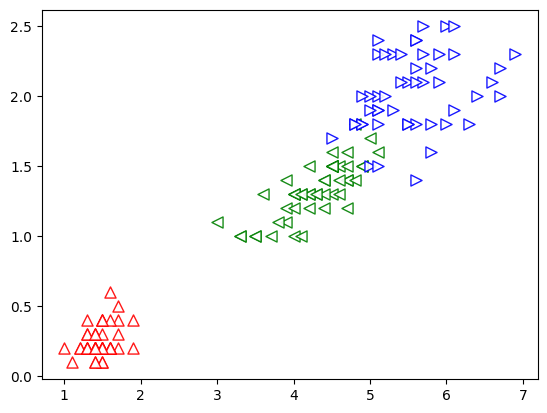

In [45]:
# Crear DataFrames para cada "cluster" real basado en el target
df1 = df[df['target'] == 0]
df2 = df[df['target'] == 1]
df3 = df[df['target'] == 2]

# Scatter plot de cada "cluster" real
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], label='Flower type 0', c='white', edgecolor='r', marker='^', s=64, alpha=0.9)
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], label='Flower type 1', c='white', edgecolor='g', marker='<', s=64, alpha=0.9)
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'], label='Flower type 2', c='white', edgecolor='b', marker='>', s=64, alpha=0.9)

# Crear DataFrames para cada "cluster" estimado
df1_est = df[df['FlowerPredicted1'] == 0]
df2_est = df[df['FlowerPredicted1'] == 1]
df3_est = df[df['FlowerPredicted1'] == 2]

# Scatter plot de cada "cluster" estimado
plt.scatter(df1_est['petal length (cm)'], df1_est['petal width (cm)'], label='Cluster 0', c='white', edgecolor='r', marker='^', s=16, alpha=0.9)
plt.scatter(df2_est['petal length (cm)'], df2_est['petal width (cm)'], label='Cluster 1', c='white', edgecolor='g', marker='<', s=16, alpha=0.9)
plt.scatter(df3_est['petal length (cm)'], df3_est['petal width (cm)'], label='Cluster 2', c='white', edgecolor='b', marker='>', s=16, alpha=0.9)

# Configuración de la gráfica
plt.title('Petal')
plt.xlabel('Length')
plt.ylabel('Width')
plt.legend()
plt.show()


<span style='color:Blue'> **Important remarks**  </span>

- Note that for K=2 ...
- Note that for K=3 ...
- Note that for K=4 ...

Concluir

# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

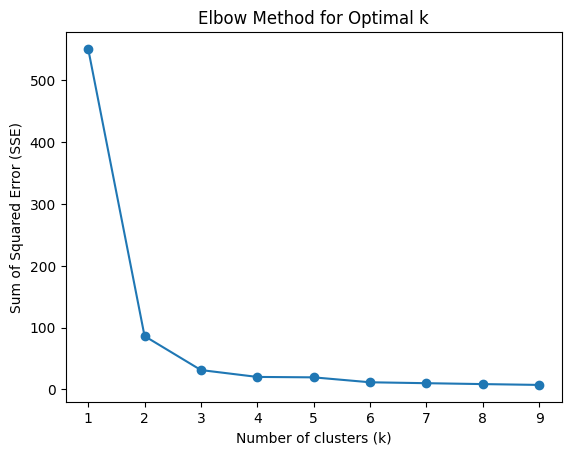

In [47]:
# Inicializar una lista para almacenar la suma de los errores cuadráticos (SSE)
sse = []

# Definir el rango de valores de k
k_rng = range(1, 10)

# Para cada valor de k
for k in k_rng:
    # Crear el modelo KMeans
    km = KMeans(n_clusters=k, n_init="auto")

    # Realizar clustering KMeans
    km.fit_predict(df[['petal length (cm)', 'petal width (cm)']])

    # Guardar el SSE para cada valor de k
    sse.append(km.inertia_)

# Visualización del método del "codo"
plt.plot(k_rng, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Error (SSE)')
plt.title('Elbow Method for Optimal k')
plt.show()


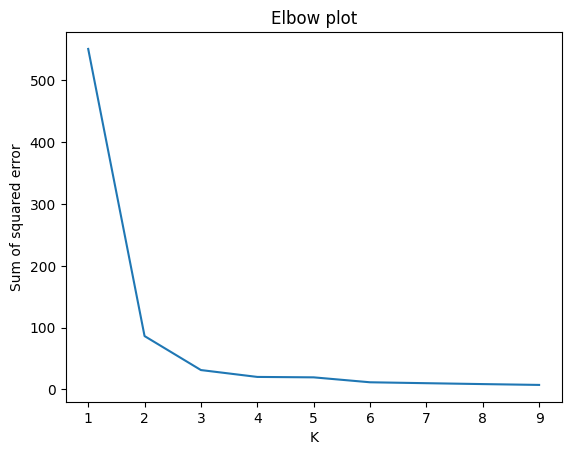

In [48]:
# Plot sse versus k
plt.plot(k_rng,sse)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

Choose the k after which the sse is minimally reduced


El valor óptimo de k es: 5


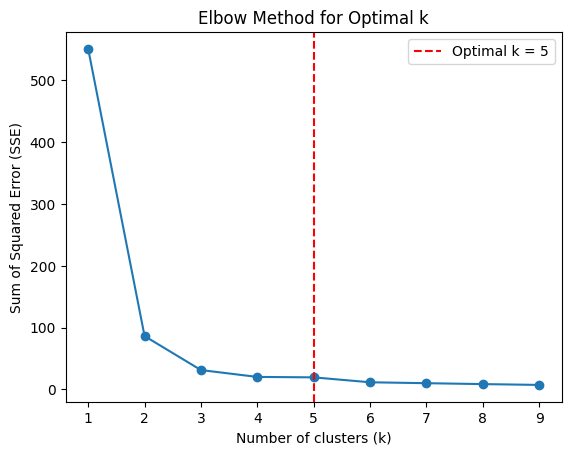

In [49]:
import numpy as np

# Calcular las diferencias de SSE entre cada par de puntos
diff_sse = np.diff(sse)

# Calcular la segunda diferencia para encontrar el "codo"
second_diff_sse = np.diff(diff_sse)

# Encontrar el índice del valor óptimo de k (el primer punto donde la tasa de cambio es mínima)
optimal_k = np.argmin(second_diff_sse) + 2  # +2 para compensar las dos diferencias

print(f"El valor óptimo de k es: {optimal_k}")

# Visualizar el método del codo con el valor óptimo de k marcado
plt.plot(k_rng, sse, marker='o')
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Error (SSE)')
plt.title('Elbow Method for Optimal k')
plt.legend()
plt.show()


# Final remarks

- The number of each cluster need to be assigned assigned

- The order of the number in each cluster is random

- If there is no information about the number of clusters k, then use the elbow plot method to choose the best number of clusters k